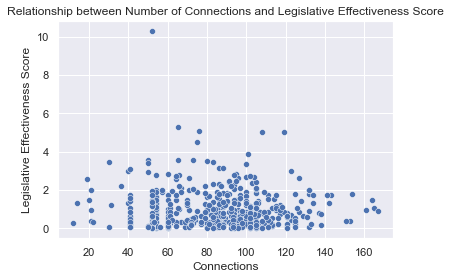

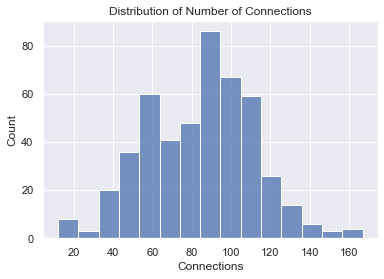

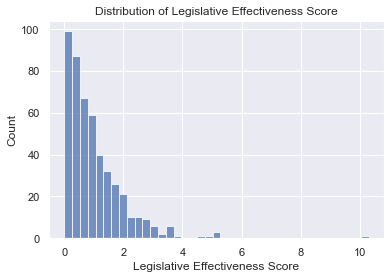

In [1]:
"""
Name: analysis.ipynb
Author: Lynette Dang

Initial findings (in Jupyter Notebook)
"""

import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

df_analysis = pd.read_csv("analysis_conn.csv")

x = np.array(df_analysis["Connections"])
y = np.array(df_analysis["Legislative Effectiveness Score"])
 
df = [['Pearson Correlation',  scipy.stats.pearsonr(x, y)[0], scipy.stats.pearsonr(x, y)[1]],
          ['Spearman Correlation', scipy.stats.spearmanr(x, y)[0], scipy.stats.spearmanr(x, y)[1]]]

df = pd.DataFrame(
    df, columns=['Test', 'correlation coefficient', 'p_value']);
sns.set_theme();
sns.scatterplot(
    data=df_analysis, x="Connections", y="Legislative Effectiveness Score").set(title='Relationship between Number of Connections and Legislative Effectiveness Score')
plot.show()
sns.histplot(data=df_analysis, x="Connections").set(title='Distribution of Number of Connections')
plot.show()
plot.show()
sns.histplot(
    data=df_analysis, x="Legislative Effectiveness Score").set(title='Distribution of Legislative Effectiveness Score')
plot.show()

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from collections import Counter
from operator import itemgetter 
df_analysis = pd.read_csv("analysis_ind.csv")
df_analysis = df_analysis[['Legislator name','Connections','Legislative Effectiveness Score']]

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import json
from collections import Counter
from operator import itemgetter 
with open('ind_network.json') as json_file:
    network = json.load(json_file)
g = nx.DiGraph()
g.add_nodes_from(network.keys())
for k, v in network.items():
    g.add_edges_from(([(k, t) for t in v if (t, k) not in g.edges()]))

In [4]:
print(nx.info(g))

DiGraph with 555 nodes and 20610 edges


In [5]:
nx.density(g)

0.06703092984681433

In [6]:
nx.average_clustering(g)

0.34320317459854066

In [7]:
bc = nx.betweenness_centrality(g, normalized=True, endpoints=True)
bc_top10 = sorted(bc.items(), key = itemgetter(1), reverse = True)[:10]
bc_top100 = [key for key, value in sorted(bc.items(), key=lambda x: x[1], reverse= True)][:100]

In [8]:
ec = nx.eigenvector_centrality_numpy(g, max_iter=500)
ec_top10 = sorted(ec.items(), key = itemgetter(1), reverse = True)[:10]
ec_top100 = [key for key, value in sorted(ec.items(), key=lambda x: x[1], reverse= True)][:100]

In [9]:
cc = nx.closeness_centrality(g)
cc_top10 = sorted(cc.items(), key = itemgetter(1), reverse = True)[:10]
cc_top100 = [key for key, value in sorted(cc.items(), key=lambda x: x[1], reverse= True)][:100]

In [10]:
dc = nx.degree_centrality(g)
dc_top10 = sorted(dc.items(), key = itemgetter(1), reverse = True)[:10]
dc_top100 = [key for key, value in sorted(dc.items(), key=lambda x: x[1], reverse= True)][:100]

In [11]:
data = pd.DataFrame(bc_top10, columns=['name', 'value'])
print("Betweenness Centrality Top 10")
data

Betweenness Centrality Top 10


name     value
0         David Trone  0.032899
1        Rodney Davis  0.018453
2           Tom Udall  0.018051
3      Richard Shelby  0.016613
4       Amy Klobuchar  0.014978
5    G.K. Butterfield  0.014060
6         Susan Davis  0.013178
7  Carolyn B. Maloney  0.012992
8         Zoe Lofgren  0.012756
9         Rob Portman  0.012499

In [12]:
data = pd.DataFrame(ec_top10, columns=['name', 'value'])
print("Eigenvector Centrality Top 10")
data

Eigenvector Centrality Top 10


name     value
0     Mike Kelly  0.415024
1  Drew Ferguson  0.357190
2   Darin LaHood  0.307449
3  Vern Buchanan  0.264573
4    Brian Babin  0.262779
5     Conor Lamb  0.242747
6      Ron Estes  0.227705
7    Mike Garcia  0.226161
8    Jason Smith  0.209523
9    Randy Weber  0.194645

In [13]:
data = pd.DataFrame(cc_top10, columns=['name', 'value'])
print("Closeness Centrality Top 10")
data

Closeness Centrality Top 10


name     value
0              Lloyd Doggett  0.460427
1  Donald Sternoff Beyer Jr.  0.456228
2                Brian Babin  0.440947
3                Mike Garcia  0.439657
4                Randy Weber  0.438368
5                Jason Smith  0.437103
6      Eddie Bernice Johnson  0.435792
7    Lizzie Pannill Fletcher  0.434505
8            Daniel Lipinski  0.431935
9                 Conor Lamb  0.430007

In [14]:
data = pd.DataFrame(dc_top10, columns=['name', 'value'])
print("Degree Centrality Top 10")
data

Degree Centrality Top 10


name     value
0      Stephen Lynch  0.272563
1     Salud Carbajal  0.259928
2         Alma Adams  0.258123
3   Anthony G. Brown  0.254513
4    Mark DeSaulnier  0.252708
5    Stacey Plaskett  0.240072
6  William Lacy Clay  0.236462
7        Steve Cohen  0.234657
8         Dina Titus  0.232852
9       Brad Sherman  0.231047

In [15]:
len(set(bc_top100).union(set(ec_top100)).union(set(cc_top100)).union(dc_top100))

251

In [16]:
bc_df = pd.DataFrame.from_dict(bc, orient='index')
bc_df.reset_index(inplace=True)
bc_df = bc_df.rename(columns={"index": "index", 0: " bc"})
ec_df = pd.DataFrame.from_dict(ec, orient='index')
ec_df.reset_index(inplace=True)
ec_df = ec_df.rename(columns={"index": "index", 0: " ec"})
dc_df = pd.DataFrame.from_dict(dc, orient='index')
dc_df.reset_index(inplace=True)
dc_df = dc_df.rename(columns={"index": "index", 0: " dc"})
cc_df = pd.DataFrame.from_dict(cc, orient='index')
cc_df.reset_index(inplace=True)
cc_df = cc_df.rename(columns={"index": "index", 0: " cc"})

In [17]:
def merge(df1, df2):
    df1 = (
        df1.merge(df2,
            left_on=['Legislator name'],
            right_on=['index'],
            how='left')
    )
    return df1

In [18]:
df_analysis = merge(df_analysis, bc_df)
df_analysis = merge(df_analysis, ec_df)
df_analysis = merge(df_analysis, cc_df)
df_analysis = merge(df_analysis, dc_df)

/Users/lidang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'index_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [19]:
df_analysis = df_analysis.drop(columns=['index_x', 'index_y', 'index_x', 'index_y'])

In [20]:
df_analysis 

Legislator name                                        Connections  \
0             Jack Reed  ['Kirsten Gillibrand', 'Tammy Duckworth', 'Joe...   
1    Kirsten Gillibrand  ['Jack Reed', 'Tammy Duckworth', 'Joe Manchin ...   
2       Tammy Duckworth  ['Jack Reed', 'Kirsten Gillibrand', 'Joe Manch...   
3           Gary Peters  ['Jack Reed', 'Kirsten Gillibrand', 'Tammy Duc...   
4      Elizabeth Warren  ['Jack Reed', 'Kirsten Gillibrand', 'Tammy Duc...   
..                  ...                                                ...   
476         Gary Palmer  ['Peter DeFazio', 'Grace Napolitano', 'Donald ...   
477         Randy Weber  ['Peter DeFazio', 'Grace Napolitano', 'Donald ...   
478         Brian Babin  ['Peter DeFazio', 'Grace Napolitano', 'Donald ...   
479     John A. Yarmuth  ['Robert C. Scott', 'Jan Schakowsky', 'David P...   
480          Conor Lamb  ['Eddie Bernice Johnson', 'Ed Perlmutter', 'Zo...   

     Legislative Effectiveness Score        bc            ec        cc  \
0                           0.346327  0.001776 -4.538188e-19  0.000000   
1                           0.338763  0.001780 -9.681299e-19  0.001805   
2                           1.529729  0.001784  3.328542e-19  0.003610   
3                           5.015463  0.002253  6.147937e-19  0.007220   
4                           0.725357  0.001796  2.142968e-18  0.009025   
..                               ...       ...           ...       ...   
476                         1.086954  0.001707  1.486364e-01  0.398346   
477                         0.069581  0.001724  1.946450e-01  0.438368   
478                         0.562175  0.001724  2.627787e-01  0.440947   
479                         1.223520  0.001727  8.357214e-02  0.412778   
480                         2.749350  0.001707  2.427475e-01  0.430007   

           dc  
0    0.117329  
1    0.108303  
2    0.115523  
3    0.119134  
4    0.111913  
..        ...  
476  0.117329  
477  0.171480  
478  0.171480  
479  0.055957  
480  0.113718  

[481 rows x 7 columns]

In [21]:
import requests
from bs4 import BeautifulSoup

# import other libraries
import json
from helper.util_network import construct_conn_network, web_crawl, web_scrape, construct_committee_network, construct_ind_network

url = "https://ballotpedia.org/116th_United_States_Congress"
headers = {"User-Agent": "web scraper for classroom purposes"}
results = requests.get(url, headers=headers)
soup = BeautifulSoup(results.text, "html")  # html.parser
committees = {}
comm_members_raw = []
pat = "\>.*\<"
committee_links = web_crawl(soup, committees)
committees = web_scrape(committee_links, committees, headers)
comm_network = construct_committee_network(committees)
ind_network = construct_ind_network(comm_network)
conn_network = construct_conn_network(comm_network)

/Users/lidang/Desktop/MACS 30200/replication-materials-LynetteDang/helper/util_network.py:51: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 51 of the file /Users/lidang/Desktop/MACS 30200/replication-materials-LynetteDang/helper/util_network.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(results.text, "html")


In [22]:
import pandas as pd
df_analysis = pd.read_csv("analysis_conn.csv")
df_analysis

Unnamed: 0     Legislator name  Connections   Legislator name.1  \
0             0           Jack Reed           80           Jack Reed   
1             1  Kirsten Gillibrand           98  Kirsten Gillibrand   
2             2     Tammy Duckworth          114     Tammy Duckworth   
3             3         Gary Peters          108         Gary Peters   
4             4    Elizabeth Warren           86    Elizabeth Warren   
..          ...                 ...          ...                 ...   
476         476         Gary Palmer           65         Gary Palmer   
477         477         Randy Weber          102         Randy Weber   
478         478         Brian Babin          102         Brian Babin   
479         479     John A. Yarmuth           31        John Yarmuth   
480         480          Conor Lamb           64          Conor Lamb   

     Legislative Effectiveness Score party  
0                           0.346327     D  
1                           0.338763     D  
2                           1.529729     D  
3                           5.015463     D  
4                           0.725357     D  
..                               ...   ...  
476                         1.086954     R  
477                         0.069581     R  
478                         0.562175     R  
479                         1.223520     D  
480                         2.749350     D  

[481 rows x 6 columns]

In [23]:
g_full = nx.Graph()

In [24]:
for k,v in ind_network.items():
    for conn in v:
        if (conn, k) not in g_full.edges():
            g_full.add_edge(k, conn)

In [25]:
color_map = ['red' if df_analysis.loc[df_analysis['Legislator name'] == n]['party'].tolist() == ['R'] else 'blue' for n in g_full]   

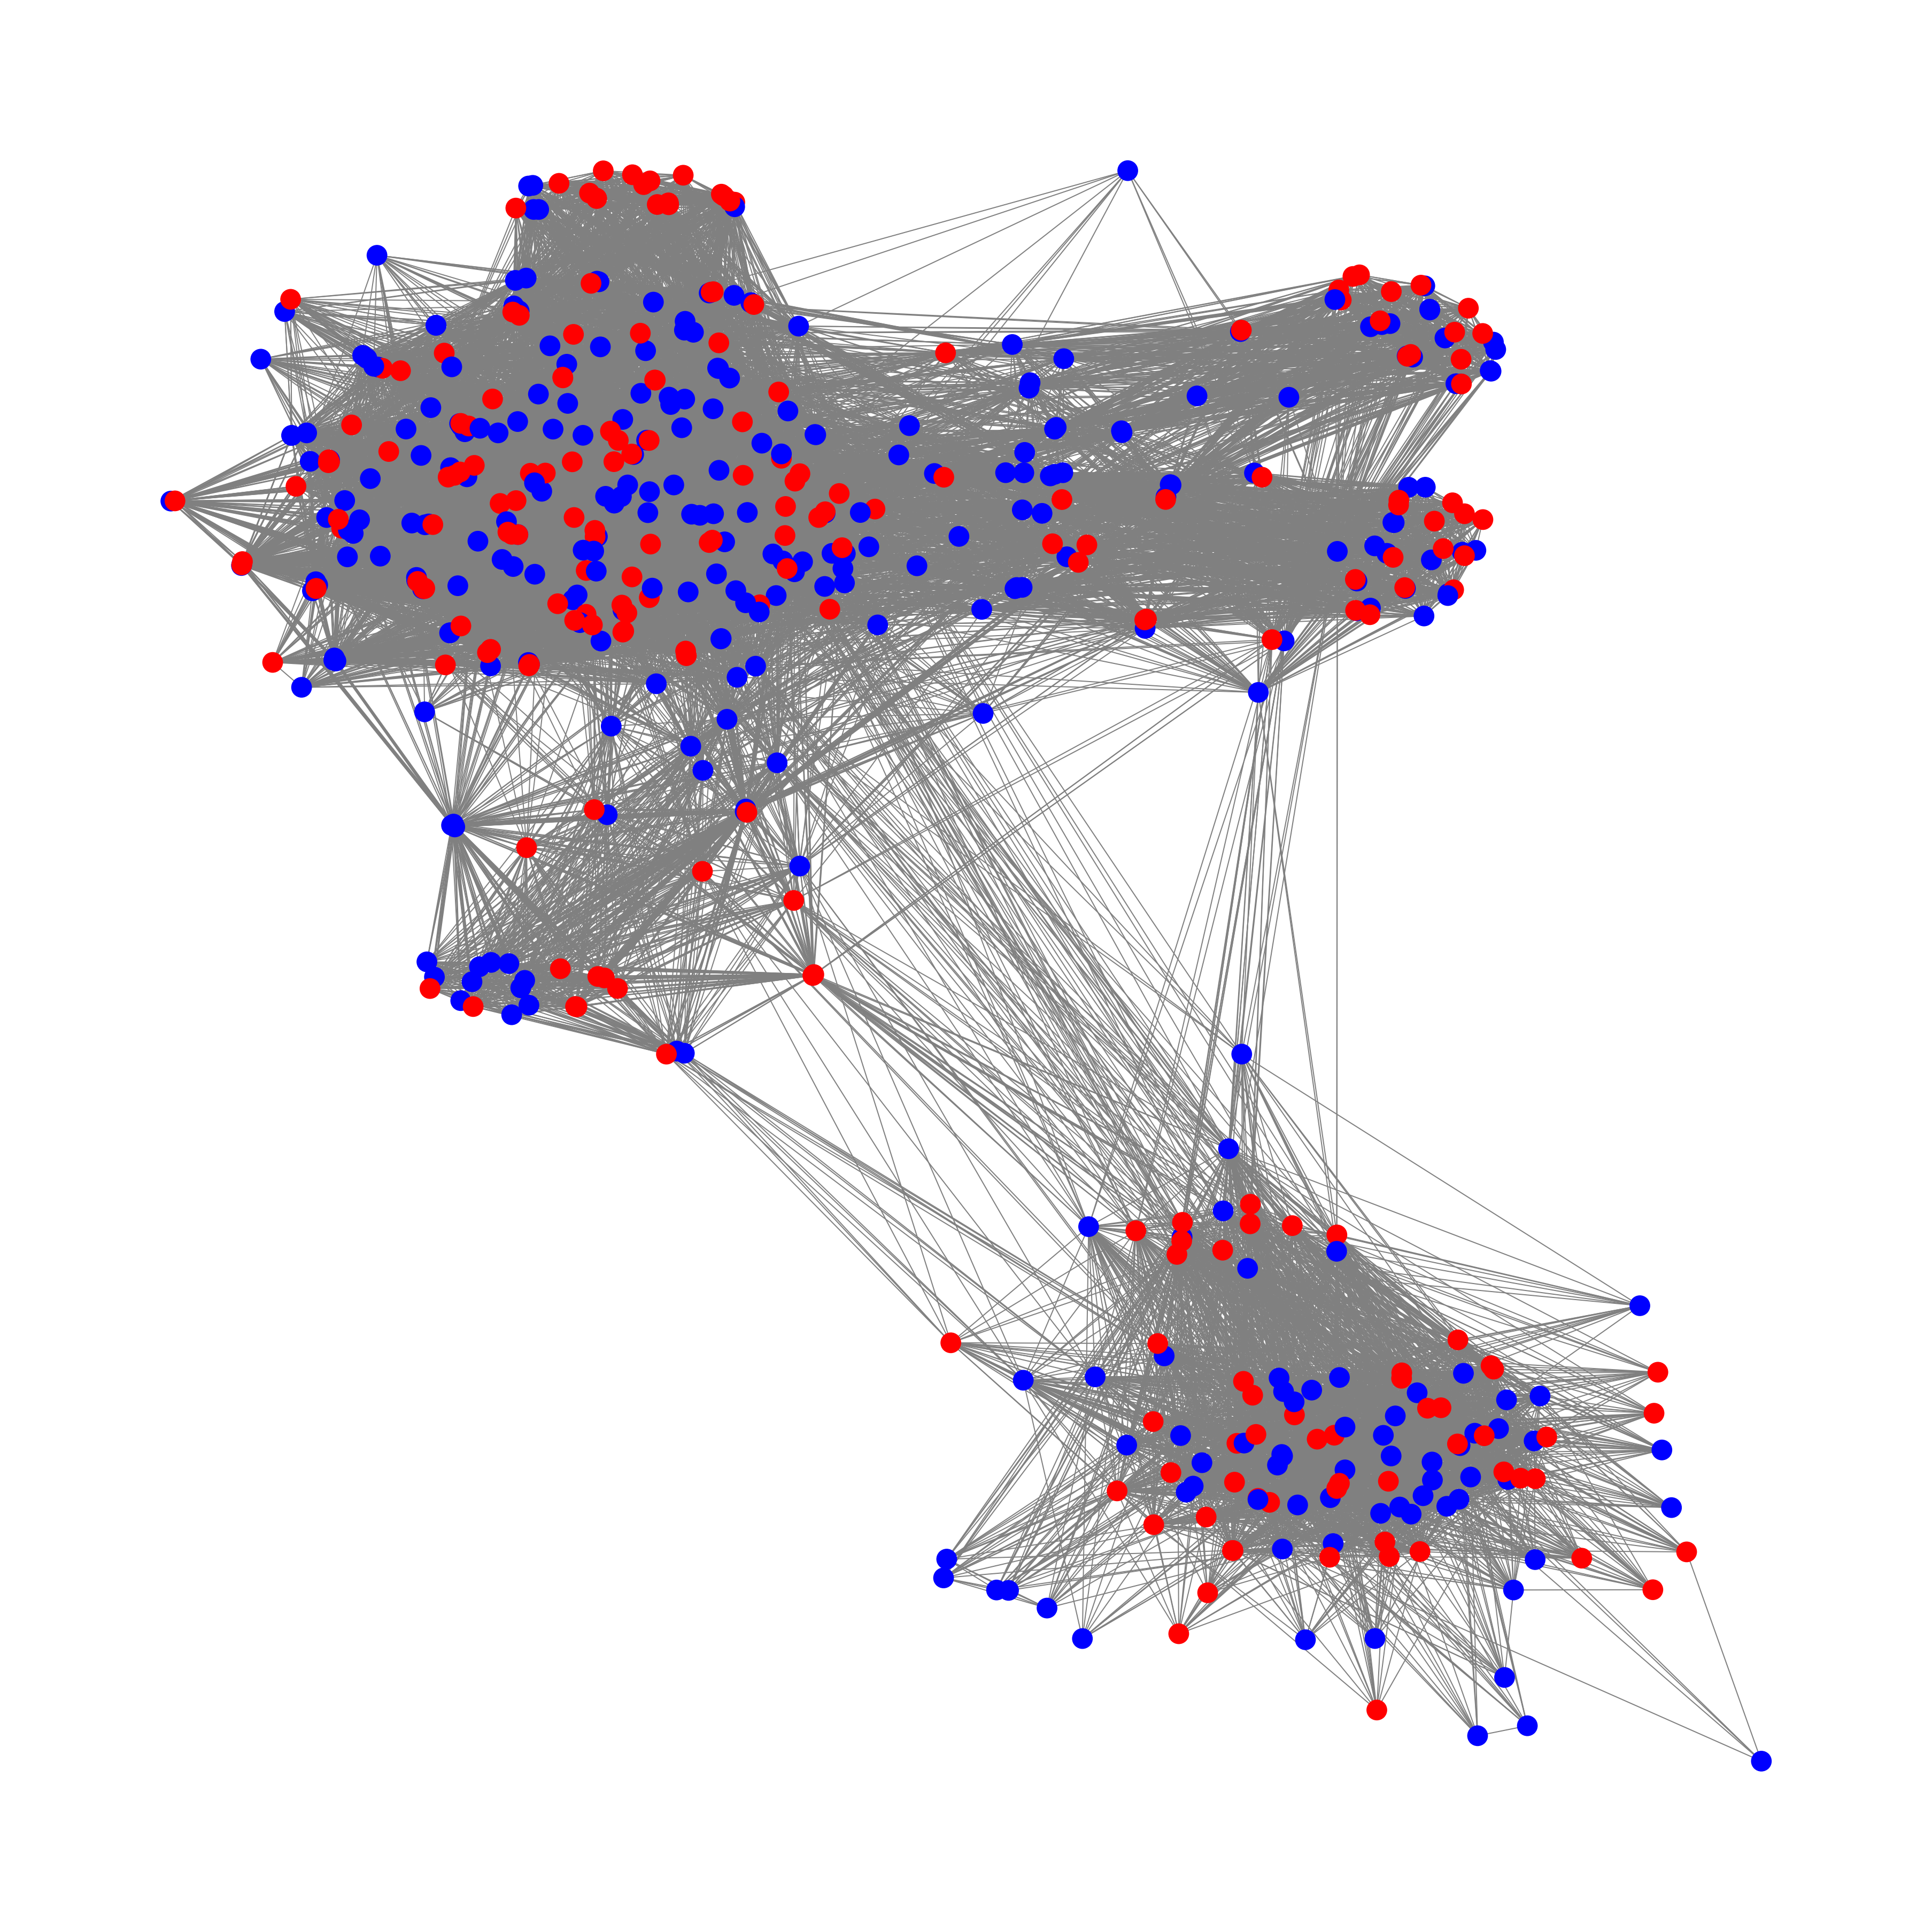

In [26]:
plt.figure(3,figsize=(50,50)) 

nx.draw(g_full, nx.spring_layout(g_full), node_size=1500, node_shape="o", linewidths=0.000000000000000000000000001, font_size=20, 
        font_color="black", font_weight="normal", node_color=color_map, width=2, edge_color="grey")

plt.show()

In [33]:
g = nx.Graph()
top_20 = ["Lamar Alexanderman",    "John Barrassoman",      "Lindsey Grahamman",     "Richard Shelbyman" ,
          "Christopher S. Murphy", "Sheldon Whitehouse",    "Jeff Merkley",          "Susan Collins" ,       
          "David Kustoff",         "William Timmons",       "Lindsey Graham" ,       "David Joyce" ,         
          "Tom Graves",            "Johnny Isakson",        "Nita Lowey",        "Eliot Engel",
          "Ilhan Omar",            "Albio Sires",           "Dean Phillips" ,     "Brad Sherman"]
for k,v in ind_network.items():
    for conn in v:
        if (conn, k) not in g.edges() and k in top_20 and conn in top_20:
            g.add_edge(k, conn)

In [34]:
party_20 = {}
for s in top_20:
    party_20[s] = 'R'
    if s in ['Christopher S. Murphy', 'Sheldon Whitehouse', 'Jeff Merkley', 'Nita Lowey', 'Eliot Engel', 'Ilhan Omar', 'Albio Sires', 'Dean Phillips', 'Brad Sherman']:
        party_20[s] = 'D'


In [35]:
color_map = ['red' if party_20[node] == 'R' else 'blue' for node in g]        

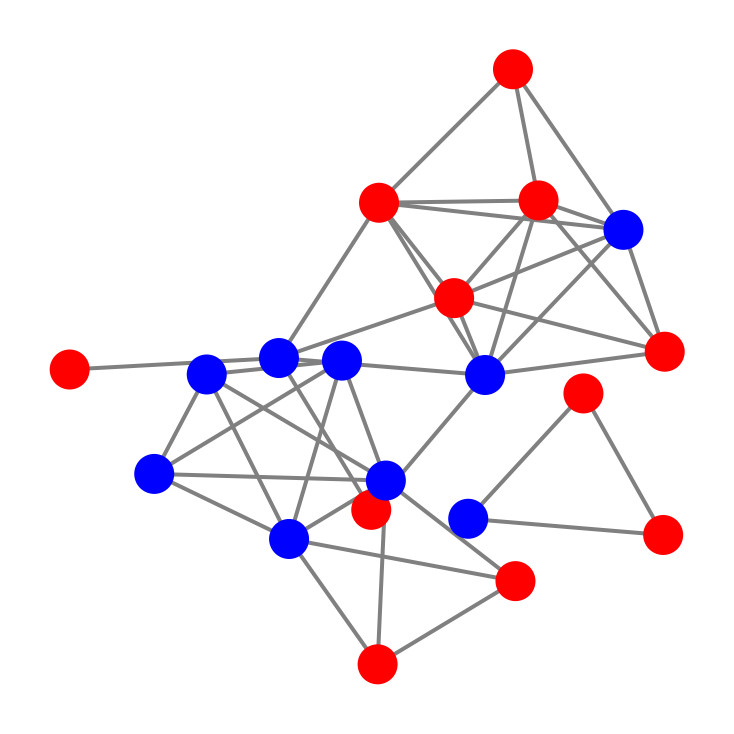

In [38]:
plt.figure(3,figsize=(10,10)) 
pos = nx.kamada_kawai_layout(g)
nx.draw(g, pos, node_size=400, node_color=color_map, node_shape="o", linewidths=20, font_size=20, 
        font_color="black", font_weight="normal", width=4, edge_color="grey")
plt.show()